In [1]:
# Data management
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd
import seaborn as sns
# Graphics
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt

# Preprocessing and modelling
# ------------------------------------------------------------------------------
from simpful import *


# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
#warnings.filterwarnings('once')
warnings.filterwarnings('ignore')

In [15]:
# Create a fuzzy system object
FS = FuzzySystem()

  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.11.1 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 Created by Marco S. Nobile (m.s.nobile@tue.nl)
 and Simone Spolaor (simone.spolaor@unimib.it)



In [16]:
# Define input fuzzy sets and linguistic variables
t_int_muy_baja = FuzzySet(points=[[0.0, 1.0],  [10, 0]], term="t_int_muy_baja")
t_int_baja = FuzzySet(points=[[5., 0.], [13.0, 1.0], [20., 0.]], term="t_int_baja")
t_int_normal = FuzzySet(points=[[15., 0.],  [27.5, 1.0], [35., 0.]], term="t_int_normal")
t_int_alta = FuzzySet(points=[[30., 0.],  [37.5, 1.0], [45., 0.]], term="t_int_alta")
t_int_muy_alta = FuzzySet(points=[[40., 0.],  [50, 1.0]], term="t_int_muy_alta")

FS.add_linguistic_variable("t_int", LinguisticVariable([t_int_muy_baja, t_int_baja, t_int_normal, t_int_alta, t_int_muy_alta], concept="t_int"))

t_ext_muy_baja = FuzzySet(points=[[0.0, 1.0],  [10, 0]], term="t_ext_muy_baja")
t_ext_baja = FuzzySet(points=[[5., 0.], [13.0, 1.0], [20., 0.]], term="t_ext_baja")
t_ext_normal = FuzzySet(points=[[15., 0.],  [27.5, 1.0], [35., 0.]], term="t_ext_normal")
t_ext_alta = FuzzySet(points=[[30., 0.],  [37.5, 1.0], [45., 0.]], term="t_ext_alta")
t_ext_muy_alta = FuzzySet(points=[[40., 0.],  [50, 1.0]], term="t_ext_muy_alta")

FS.add_linguistic_variable("t_ext", LinguisticVariable([t_ext_muy_baja, t_ext_baja, t_ext_normal, t_ext_alta, t_ext_muy_alta], concept="t_ext"))

v_poca = FuzzySet(points=[[1000.0, 1.0],  [3000.0, 0]], term="v_poca")
v_media = FuzzySet(points=[[2000.0, 0.], [3500.0, 1.0], [5000., 0.]], term="v_media")
v_mucha = FuzzySet(points=[[4000.0, 0.],  [6000, 1.0]], term="v_mucha")

FS.add_linguistic_variable("v", LinguisticVariable([v_poca, v_media, v_mucha], concept="v"))



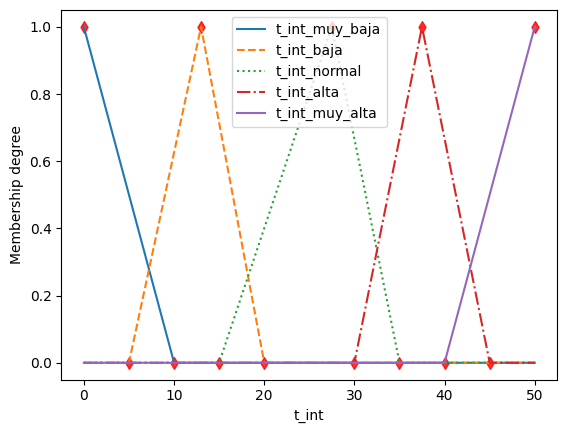

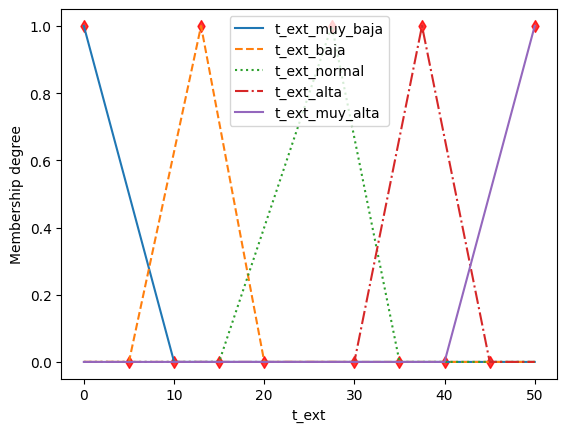

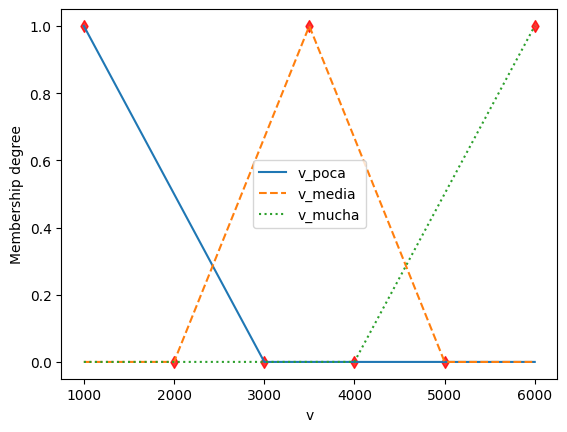

In [17]:
FS.plot_variable('t_int')
FS.plot_variable('t_ext')
FS.plot_variable('v')

In [18]:
# Define fuzzy rules
R1 = "IF (t_ext IS t_ext_muy_baja)  AND (t_int IS t_int_normal) THEN (v IS v_mucha)"
R2 = "IF (t_ext IS t_ext_alta)  AND (t_int IS t_int_alta) THEN (v IS v_poca)"
R3 = "IF (t_ext IS t_ext_alta)  AND (t_int IS t_int_baja) THEN (v IS v_media)"
R4 = "IF (t_ext IS t_ext_alta)  AND (t_int IS t_int_normal) THEN (v IS v_mucha)"
R5 = "IF (t_ext IS t_ext_muy_alta)  AND (t_int IS t_int_muy_alta) THEN (v IS v_poca)"
R6 = "IF (t_ext IS t_ext_muy_alta)  AND (t_int IS t_int_normal) THEN (v IS v_media)"

FS.add_rules([R1, R2, R3, R4, R5, R6])


In [22]:
# Define facts observed
input_t_ext=44
input_t_int=32


# Set antecedents values
FS.set_variable("t_ext", input_t_ext)
FS.set_variable("t_int", input_t_int)

In [23]:
# GRado de cumplimiento de reglas
FS.get_firing_strengths()

[0.0, 0.1333333333333333, 0.0, 0.1333333333333333, 0.0, 0.4]

In [24]:
print(FS.Mamdani_inference(["v"]))

{'v': 3499.999999999981}
